In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as sts

In [4]:
movies = pd.read_csv("/Users/saqib/Downloads/stat_book_data/fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
(movies["Fandango_Stars"] < 3).sum()

0

(array([12.,  0., 27.,  0.,  0., 41.,  0., 55.,  0., 11.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

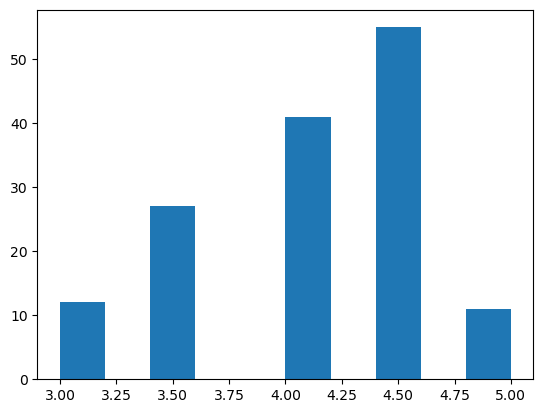

In [20]:
plt.hist(x= (movies["Fandango_Stars"]))

(array([ 1.,  2., 20., 14.,  0., 22., 27., 20., 25., 15.]),
 array([0.5, 0.9, 1.3, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.1, 4.5]),
 <BarContainer object of 10 artists>)

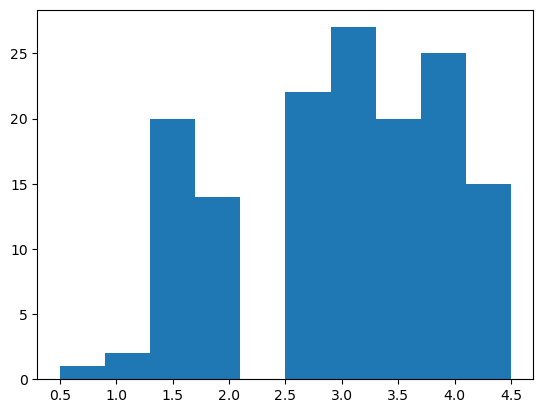

In [16]:
plt.hist(x= (movies["Metacritic_norm_round"]))

In [29]:
fandango_mean = movies["Fandango_Stars"].mean().round(2)

In [31]:
fandango_mean

4.09

In [33]:
fandango_median = movies["Fandango_Stars"].median()

In [35]:
fandango_median

4.0

In [37]:
meta_mean = movies["Metacritic_norm_round"].mean().round(2)
meta_median = movies["Metacritic_norm_round"].median()
print("Metacritic mean:" + str(meta_mean))
print("metacrictic median:" + str(meta_median))

Metacritic mean:2.97
metacrictic median:3.0


lets check corr between fandango and metacritic


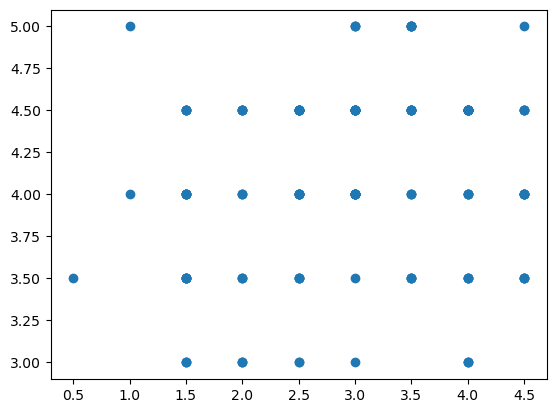

In [40]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

there is low correlation

In [43]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies.sort_values(by= "fm_diff", ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [47]:
sts.pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

PearsonRResult(statistic=0.17844919073895935, pvalue=0.031161516228523888)

In [57]:
slope, intercept, r_value, p_value, stderr_slope = sts.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print("Slope:" + str(slope))
print("Intercept" + str(intercept))
print("r_value:" + str(r_value))
print("p_value:" + str(p_value))
print("stderr_slope" + str(stderr_slope))

Slope:0.09731107797392835
Intercept3.799773918899419
r_value:0.17844919073895893
p_value:0.0311615162285243
stderr_slope0.044713544656798304


1.	Slope:
	•	The slope of the regression line. It represents how much Fandango_Stars changes for each unit change in Metacritic_norm_round. In other words, it’s the coefficient that multiplies Metacritic_norm_round in the equation of the line:

2.	Intercept:
	•	The intercept of the regression line. This is the value of Fandango_Stars when Metacritic_norm_round is zero.

3.	r_value (Correlation Coefficient):
	•	The Pearson correlation coefficient (same as the r_value from sts.pearsonr()). It measures the strength and direction of the linear relationship between the two variables, ranging from -1 to 1. A value close to 1 indicates a strong positive relationship, while a value close to -1 indicates a strong negative relationship.

4.	p_value:
	•	The p-value for the hypothesis test that the slope is zero (i.e., no relationship between the two variables). A small p-value (typically < 0.05) indicates that there is evidence to reject the null hypothesis, meaning the slope is significantly different from zero.

5.	stderr_slope (Standard Error of the Slope):
	•	The standard error of the slope is a measure of the precision of the estimated slope. A smaller standard error means that the slope estimate is more reliable.

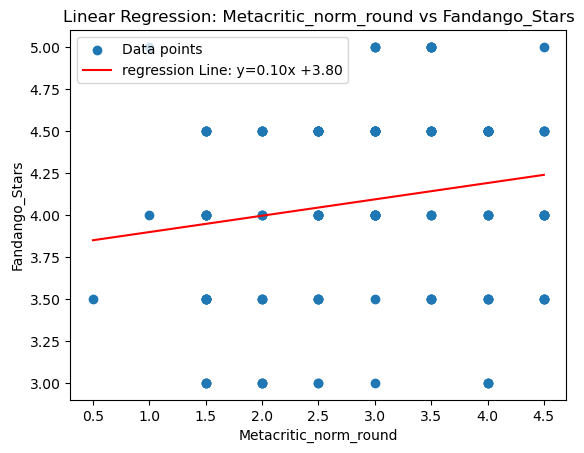

In [62]:
# Scatter plot of the data points
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"], label="Data points")

# Define the regression line equation using slope and intercept
x = np.linspace(min(movies["Metacritic_norm_round"]), max(movies["Metacritic_norm_round"]), 100)
y = slope * x + intercept

# Plot the regression line
plt.plot(x, y, color="red", label= f'regression Line: y={slope:.2f}x +{intercept:.2f}')

#Adding labels and title
plt.xlabel("Metacritic_norm_round")
plt.ylabel("Fandango_Stars")
plt.title("Linear Regression: Metacritic_norm_round vs Fandango_Stars")
plt.legend()
plt.show()

 Interpreting Residuals

Residuals are the differences between the actual values and the values predicted by the regression model. Residuals help determine whether the model fits the data well. Ideally, the residuals should be randomly distributed around zero, indicating that the model captures the relationship well without bias.

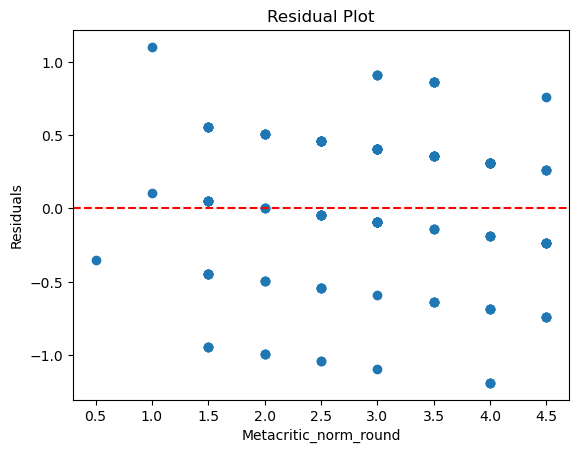

In [101]:
# Predicted values based on the regression line
predicted_values = slope * movies["Metacritic_norm_round"] + intercept

# Residuals
residuals = movies["Fandango_Stars"] - predicted_values

# Plotting residuals
plt.scatter(movies["Metacritic_norm_round"], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Metacritic_norm_round")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Patterns in Residuals:
	•	Non-random patterns (such as a curve or trend) in the residuals may indicate that the model is missing some important nonlinear relationships or that the model assumptions (like linearity or homoscedasticity) are not being met.

Homoscedasticity:
	•	This means that the variance of the residuals should be consistent across all levels of Metacritic_norm_round. If the spread of residuals widens or narrows, it suggests heteroscedasticity, which violates the assumptions of linear regression.

In [73]:
from scipy.stats import zscore

# Calculate z-scores of the residuals
z_scores = np.abs(zscore(residuals))

# Identify outliers (z-score > 3)
outliers = movies[z_scores > 3]

print("Outliers detected:\n", outliers)


Outliers detected:
 Empty DataFrame
Columns: [FILM, RottenTomatoes, RottenTomatoes_User, Metacritic, Metacritic_User, IMDB, Fandango_Stars, Fandango_Ratingvalue, RT_norm, RT_user_norm, Metacritic_norm, Metacritic_user_nom, IMDB_norm, RT_norm_round, RT_user_norm_round, Metacritic_norm_round, Metacritic_user_norm_round, IMDB_norm_round, Metacritic_user_vote_count, IMDB_user_vote_count, Fandango_votes, Fandango_Difference, fm_diff]
Index: []

[0 rows x 23 columns]


Outliers and high-leverage points can disproportionately affect the regression model and can be detected by examining residuals or using influence diagnostics.

In [75]:
r_squared = r_value ** 2
print(f"R-squared: {r_squared}")

R-squared: 0.03184411367538934


R-squared (r_value**2): This represents the proportion of the variance in the dependent variable that is predictable from the independent variable. A value closer to 1 means the model explains most of the variance.

In [77]:
import numpy as np

std_error_reg = np.sqrt(np.mean(residuals**2))
print(f"Standard Error of the Regression: {std_error_reg}")

Standard Error of the Regression: 0.529888250435729


The Standard Error of the Regression (S) measures how far data points fall from the regression line, on average. It provides insight into the accuracy of predictions made by your model.

Interpretation:
	•	A smaller standard error indicates that the data points are closer to the regression line, implying a better fit.
	•	A larger standard error means that the data points are spread out and the model may not be very accurate in predicting outcomes.

In [79]:
mae = np.mean(np.abs(residuals))
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.43858646267750934


Mean Absolute Error (MAE). It calculates the average absolute difference between actual and predicted values, which gives a better sense of model accuracy. A lower MAE means that your model predictions are closer to the actual values.

In [81]:
rmse = np.sqrt(np.mean(residuals ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.529888250435729


RMSE is similar to the standard error but places more emphasis on larger errors. The RMSE indicates the average magnitude of prediction errors, where larger errors weigh more heavily. A smaller RMSE suggests better model performance.

### Conclusion
R-squared : tells you how much of the variation in the dependent variable is explained by the independent variable.

Standard Error of the Regression : gives you a sense of how far the data points deviate from the regression line, on average.
	

Residual Analysis:  helps you detect any patterns or issues in the model’s assumptions.
	

MAE and RMSE: provide useful metrics to measure prediction accuracy.
	

Outliers and Leverage Points : are important to identify as they can distort the model.


# Extras
## Polynomial Regression
Polynomial regression is useful when the relationship between the independent variable (Metacritic_norm_round) and the dependent variable (Fandango_Stars) is nonlinear. Instead of fitting a straight line (linear regression), you fit a curved line by adding polynomial terms 

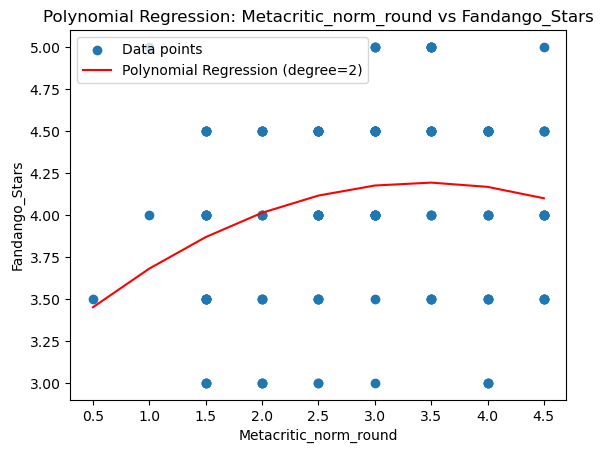

In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Creating polynomial features (e.g., degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(movies["Metacritic_norm_round"].values.reshape(-1, 1))

# Fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, movies["Fandango_Stars"])

# Predicted values using polynomial regression
predicted_poly = poly_reg_model.predict(X_poly)

# Plotting the original data and the polynomial regression curve
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"], label="Data points")

# Plotting the polynomial curve
sorted_X = np.sort(movies["Metacritic_norm_round"])
plt.plot(sorted_X, poly_reg_model.predict(poly.fit_transform(sorted_X.reshape(-1, 1))), color='red', label='Polynomial Regression (degree=2)')

plt.xlabel("Metacritic_norm_round")
plt.ylabel("Fandango_Stars")
plt.title("Polynomial Regression: Metacritic_norm_round vs Fandango_Stars")
plt.legend()
plt.show()

In [121]:
movies.shape

(146, 23)

In [123]:
cleaned_movies = movies[z_scores <= 3]  # Removing outliers with z-scores > 3

In [125]:
cleaned_movies.shape

(146, 23)

there is no outlier therefore no deletion